In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
# 한글 인코딩 해결
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [68]:
rating = pd.read_excel("rating.xlsx", skiprows=1)
df = pd.read_excel("sell_performance.xlsx", skiprows=1, parse_dates=['방송일시'], dayfirst=False)

In [3]:
print(df.shape)
df.head()

(38309, 8)


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [4]:
df['방송일시'] = pd.to_datetime(df['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [5]:
df['date']       = df['방송일시'].dt.date         # YYYY-MM-DD(문자)
# df['year']       = df['방송일시'].dt.year         # 연(4자리숫자)
df['month']      = df['방송일시'].dt.month        # 월(숫자)
# df['month_name'] = df['방송일시'].dt.month_name() # 월(문자)
df['day']        = df['방송일시'].dt.day          # 일(숫자)
df['time']       = df['방송일시'].dt.time         # HH:MM:SS(문자)
df['hour']       = df['방송일시'].dt.hour         # 시(숫자)
df['minute']     = df['방송일시'].dt.minute       # 분(숫자)

df['판매수량'] = df['취급액']/df['판매단가']

In [6]:
# 이상치
df[df['취급액']<df['판매단가']]['취급액'].describe()

count     1990.0
mean     50000.0
std          0.0
min      50000.0
25%      50000.0
50%      50000.0
75%      50000.0
max      50000.0
Name: 취급액, dtype: float64

In [7]:
# 상품군 : 잡화, 건강기능, 농축산
retail = df[(df['상품군']=='잡화') | (df['상품군']=='건강기능') | (df['상품군']=='농수축')]
retail.shape
retail['노출(분)'].fillna(method='ffill', inplace=True)
retail.isna().sum()

/Users/soo._.yonee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


방송일시      0
노출(분)     0
마더코드      0
상품코드      0
상품명       0
상품군       0
판매단가      0
취급액       0
date      0
month     0
day       0
time      0
hour      0
minute    0
판매수량      0
dtype: int64

In [8]:
retail.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,month,day,time,hour,minute,판매수량
29,2019-01-01 15:00:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,14113000.0,2019-01-01,1,1,15:00:00,15,0,231.740558
30,2019-01-01 15:20:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,32395000.0,2019-01-01,1,1,15:20:00,15,20,531.937603
31,2019-01-01 15:40:00,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,39669000.0,2019-01-01,1,1,15:40:00,15,40,651.379310
32,2019-01-01 16:00:00,20.0,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,60787000.0,2019-01-01,1,1,16:00:00,16,0,1218.176353
33,2019-01-01 16:20:00,20.0,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,115457000.0,2019-01-01,1,1,16:20:00,16,20,2313.767535


**상품군별 노출시간분포**...를 보려고 했으나 outlier 넘 많아서 테이블로 보는게 편할듯

In [9]:
# 건강기능 : 대부분 20분 편성
exp_health = retail[retail['상품군']=='건강기능']['노출(분)'].value_counts().to_frame('count')
exp_health['percentage'] = exp_health['count'] / ([sum(exp_health['count'])/100] * len(exp_health)) 
exp_health

,count,percentage
20.000000,759,96.075949
30.000000,14,1.772152
13.000000,3,0.379747
16.166667,2,0.253165
17.166667,2,0.253165
40.000000,2,0.253165
15.666667,1,0.126582
15.333333,1,0.126582
26.683333,1,0.126582
29.983333,1,0.126582


In [10]:
# 농수축 : 대부분 20분 (10분짜리 조금, 15분짜리 조금)
exp_food = retail[retail['상품군']=='농수축']['노출(분)'].value_counts().to_frame('count')
exp_food['percentage'] = exp_food['count'] / ([sum(exp_food['count'])/100] * len(exp_food)) 
exp_food

,count,percentage
20.000000,3675,94.618950
10.000000,127,3.269825
15.000000,21,0.540680
15.016667,7,0.180227
15.166667,7,0.180227
30.000000,6,0.154480
16.666667,6,0.154480
13.000000,5,0.128733
15.333333,2,0.051493
11.333333,2,0.051493


In [11]:
# 잡화 : 20분 편성이 67%, 30분편성이 26%
exp_etc = retail[retail['상품군']=='잡화']['노출(분)'].value_counts().to_frame('count')
exp_etc['percentage'] = exp_etc['count'] / ([sum(exp_etc['count'])/100] * len(exp_etc)) 
exp_etc

,count,percentage
20.000000,2610,67.077872
30.100000,693,17.810332
30.000000,322,8.275508
10.000000,107,2.749936
20.066667,63,1.619121
16.100000,15,0.385505
15.000000,10,0.257003
16.700000,9,0.231303
25.200000,7,0.179902
15.166667,6,0.154202


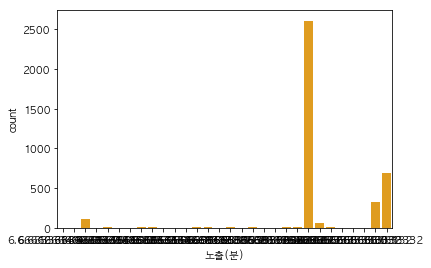

In [12]:
sns.countplot(x='노출(분)', data=retail[retail['상품군']=='잡화'], color='orange')
# sns.countplot(x='노출(분)', data=retail, hue='상품군')
# 아웃라이어 넘 많아서 그래프 모양 이상;;

**상품군별 판매단가 가격대분포**

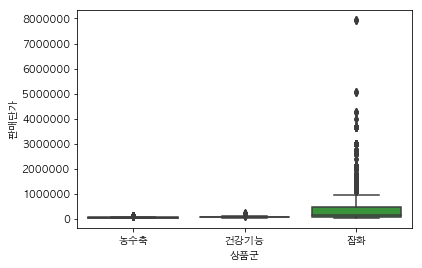

In [13]:
sns.boxplot(x='상품군', y='판매단가', data=retail)

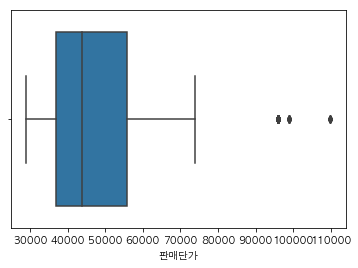

In [14]:
sns.boxplot(x='판매단가', data=retail[retail['상품군']=='농수축'])

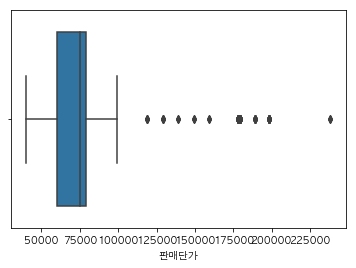

In [15]:
sns.boxplot(x='판매단가', data=retail[retail['상품군']=='건강기능'])

**x : 방송일시 y : 판매량/판매갯수 총액**  
groupby 후 시각화

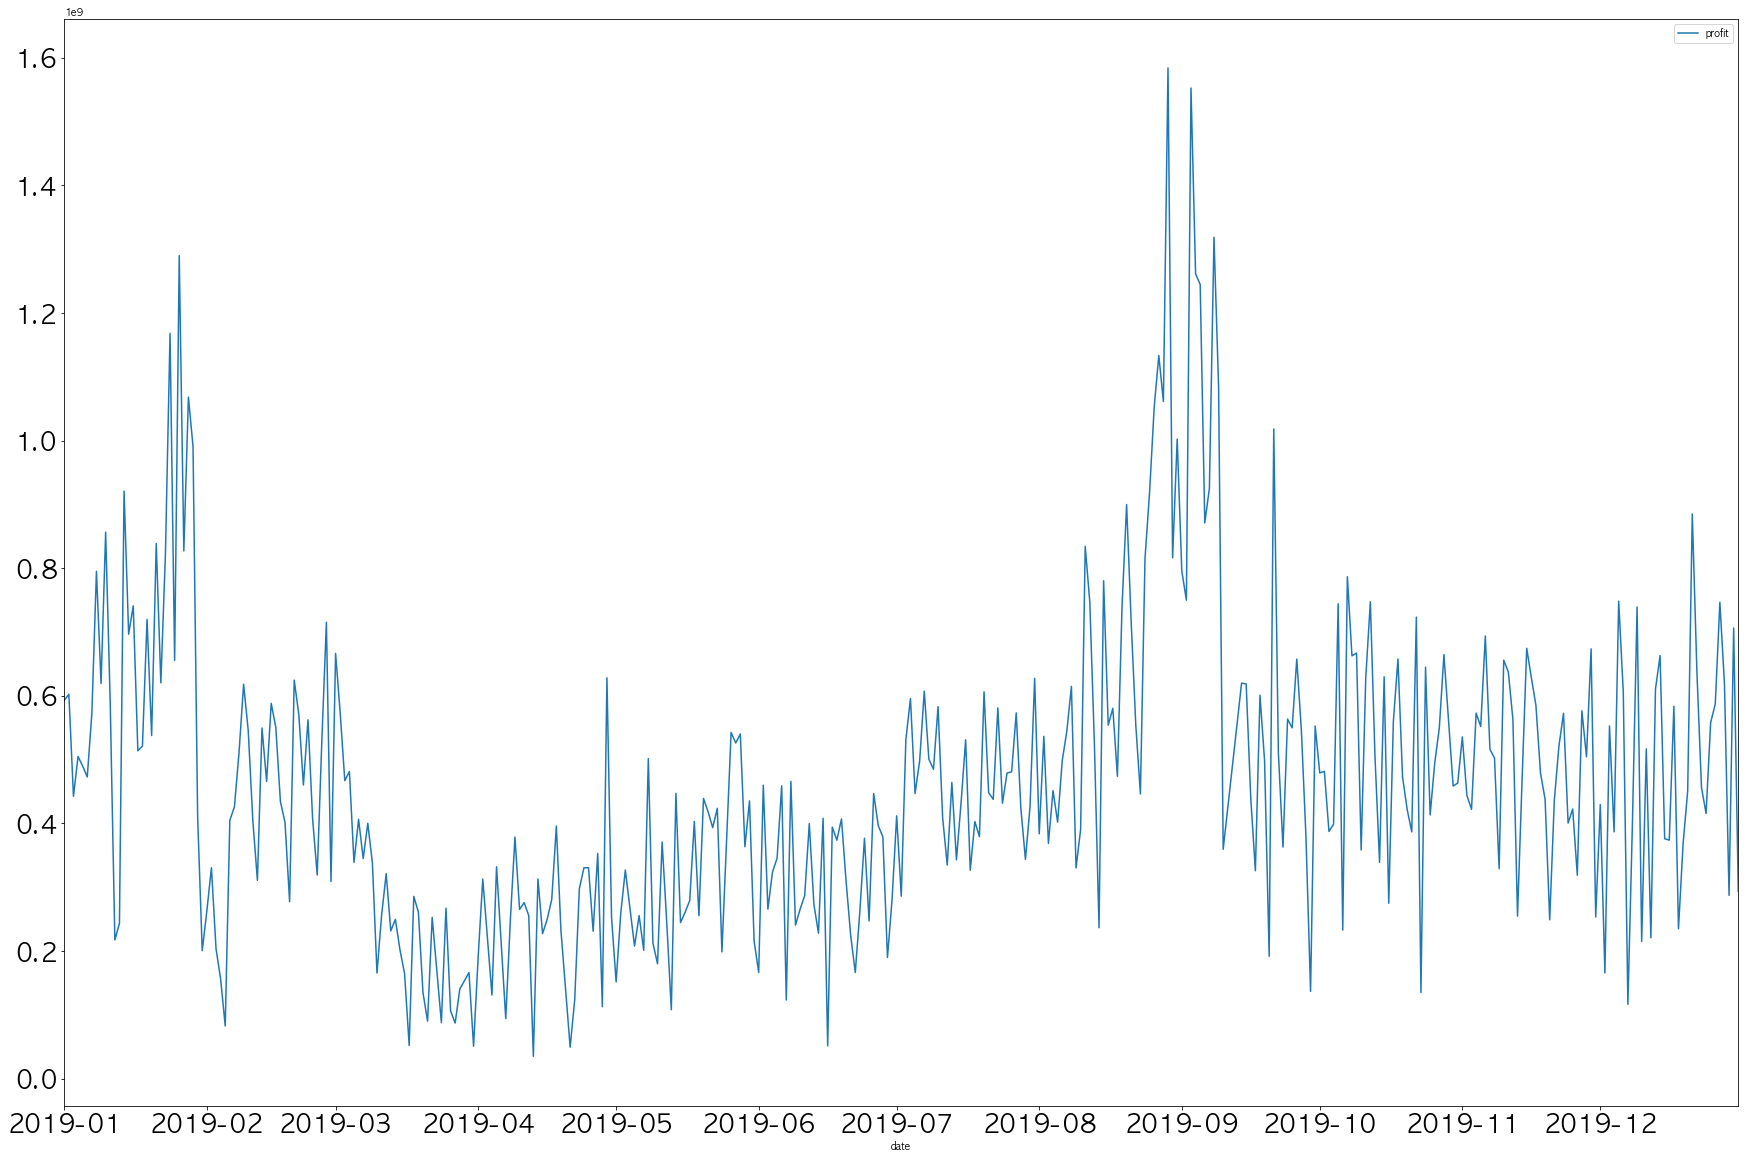

In [16]:
# 좀 더 보기 편하게 만들 수 없을까,,
# 농수축 상품군의 경우 연초(1-2월)과 명절시즌(8-10) 취급액이 가장 많음 (판매수량도 개형 동일)
prof_food = retail[retail['상품군']=='농수축'].groupby('date').sum()['취급액'].to_frame('profit')
prof_food.plot(figsize=(30, 20), fontsize=25)

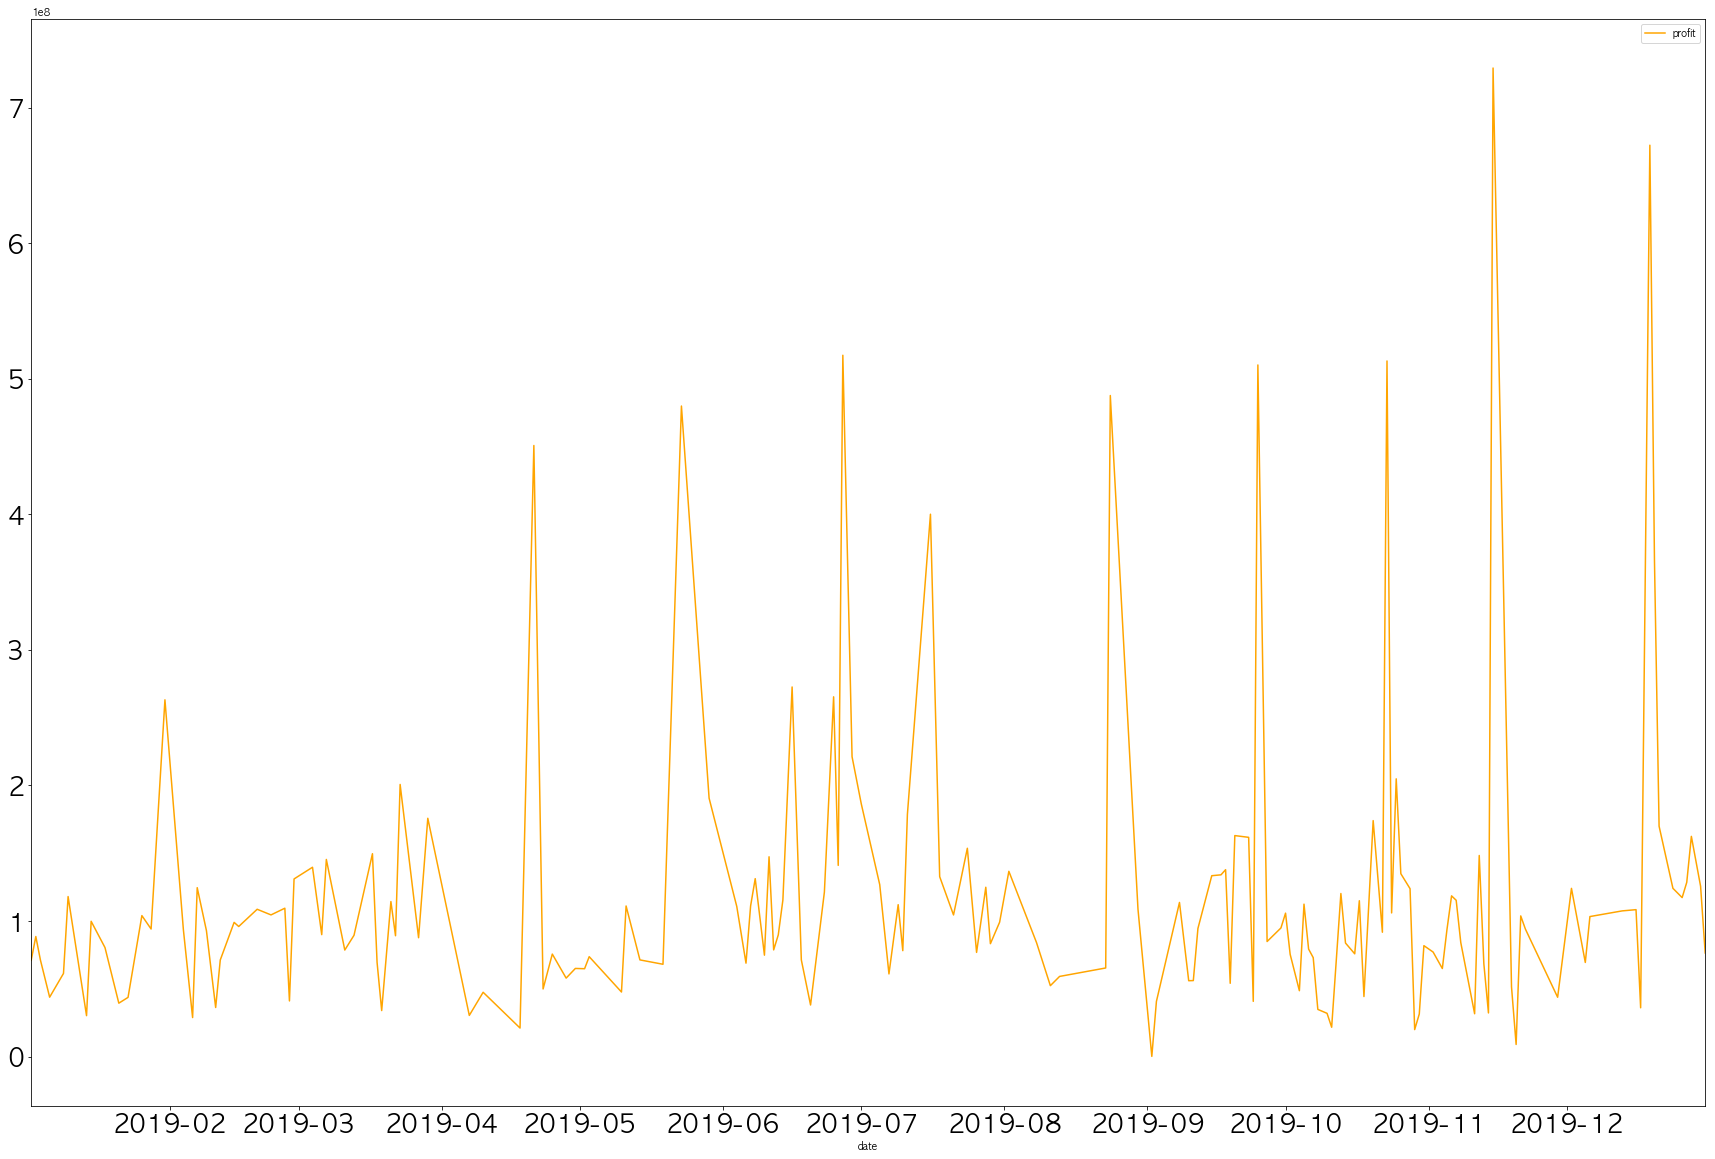

In [17]:
# 건강기능은 매우 들쭉날쭉함,, 어떻게 해석해야 하는거지,,,?
prof_health = retail[retail['상품군']=='건강기능'].groupby('date').sum()['취급액'].to_frame('profit')
prof_health.plot(color='orange', figsize=(30, 20), fontsize=25)

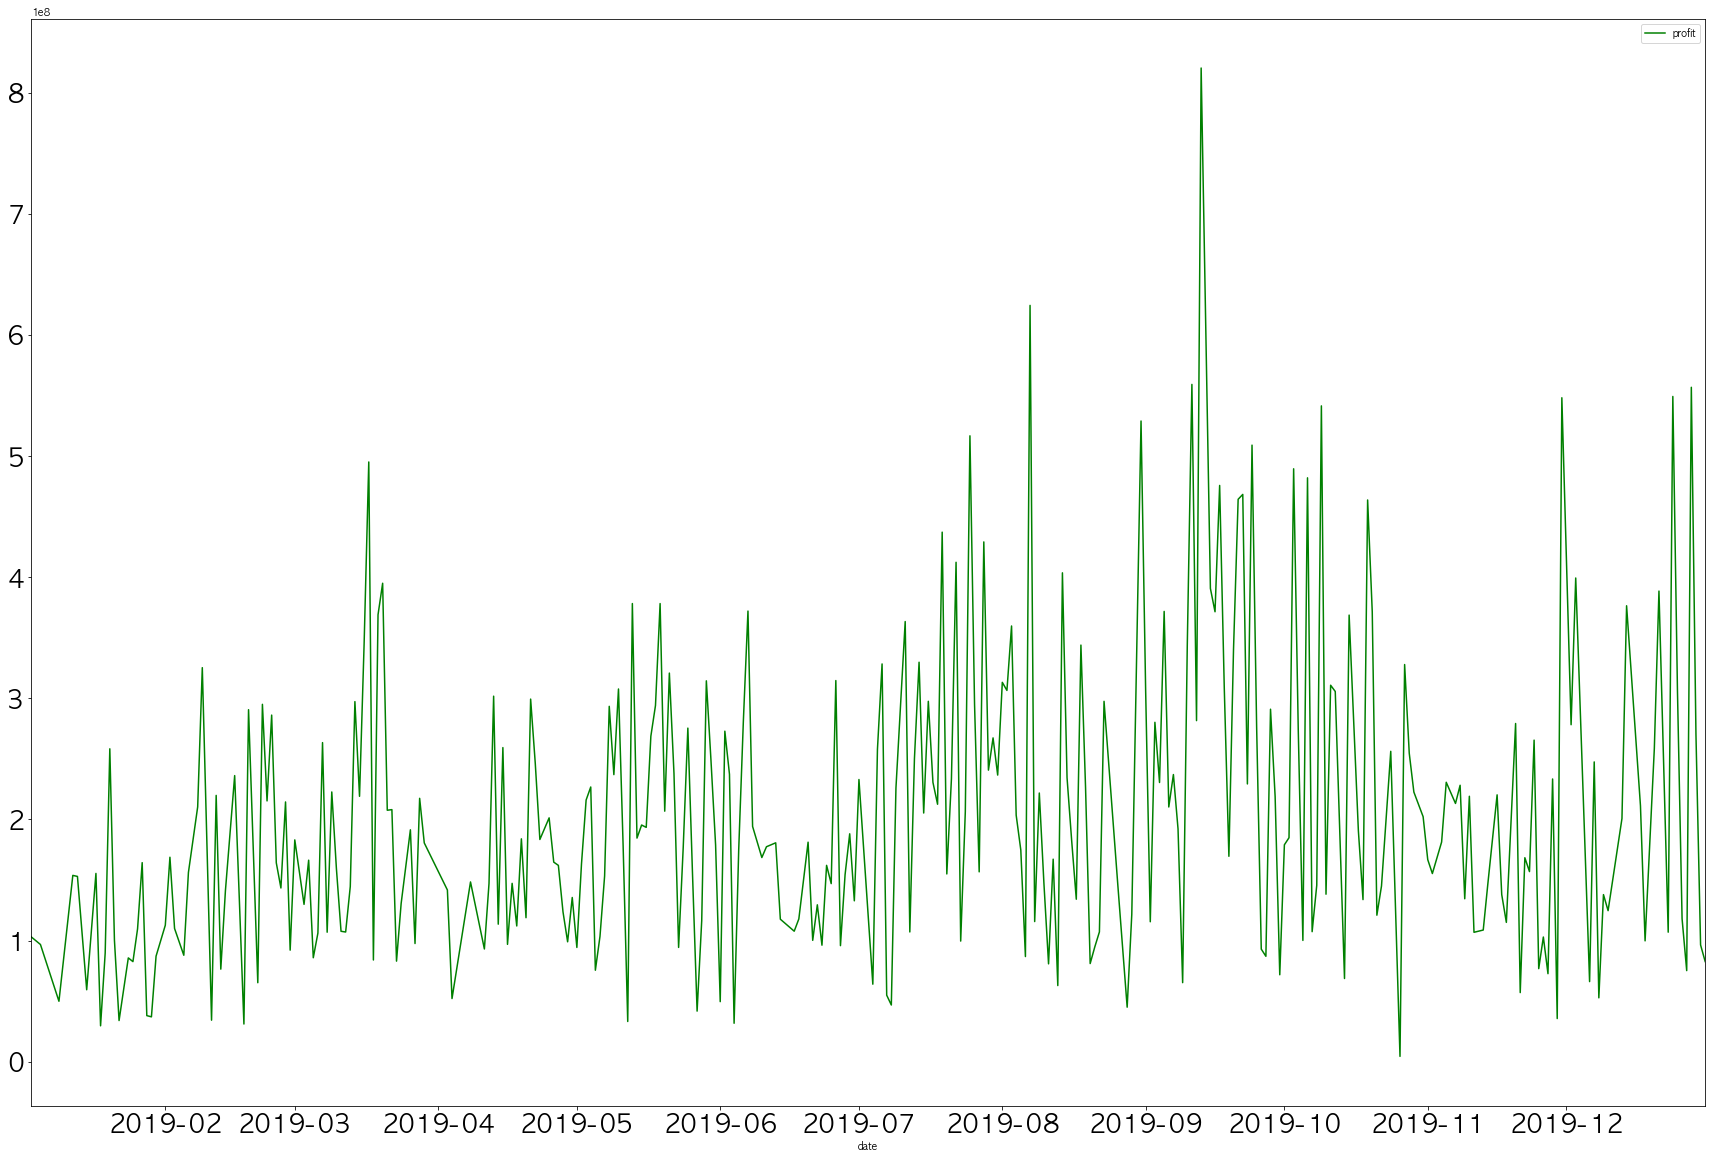

In [18]:
# 잡화는 전체적으로 새학기 시즌,,,? 3월경, 9월경
prof_etc = retail[retail['상품군']=='잡화'].groupby('date').sum()['취급액'].to_frame('profit')
prof_etc.plot(color='green', figsize=(30, 20), fontsize=25)

**x : 방송시간 y : 판매량/판매갯수 총액**  
시간대별 판매량  
groupby 후 시각화

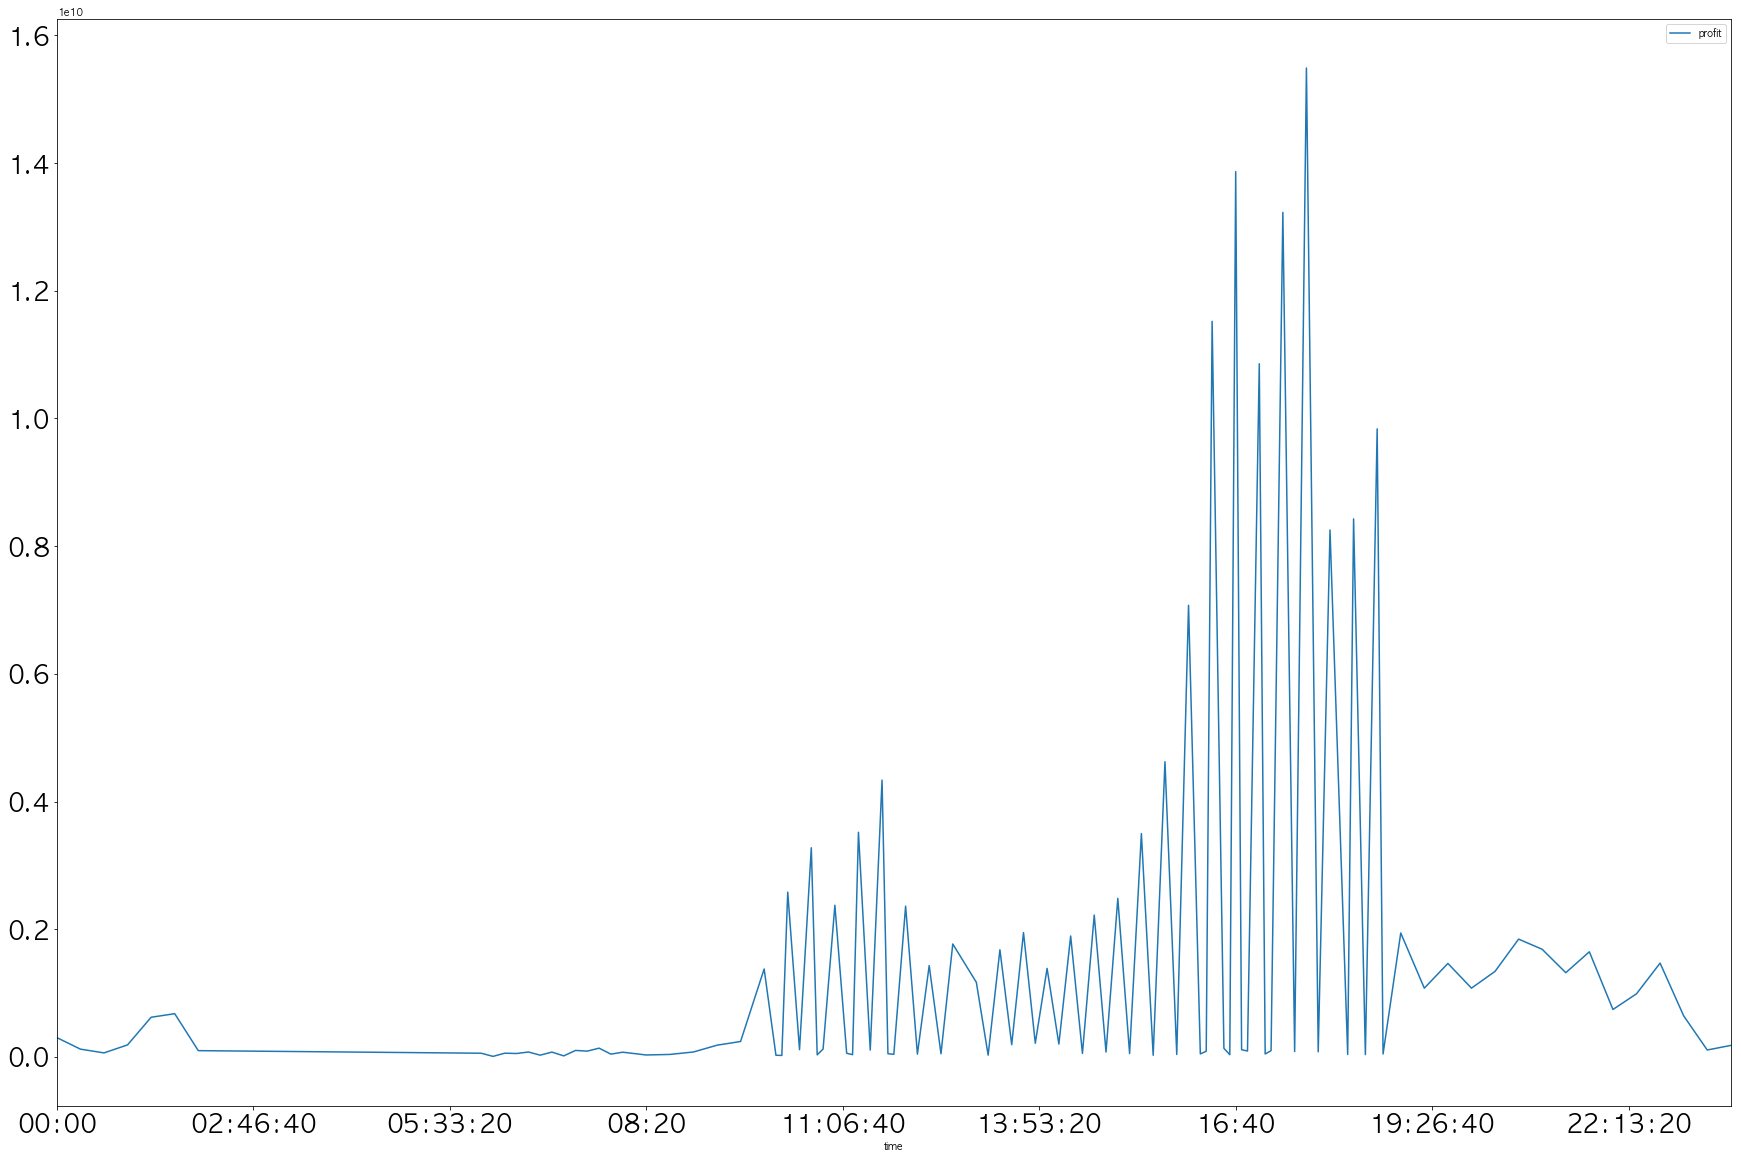

In [19]:
# 농수축 상품군의 경우 오후 4시 반 경부터 7시 반 경까지가 피크
# 의외로 야식먹는 시간에 그렇게 많이 팔리지는 않음
time_food = retail[retail['상품군']=='농수축'].groupby('time').sum()['취급액'].to_frame('profit')
time_food.plot(figsize=(30, 20), fontsize=25)

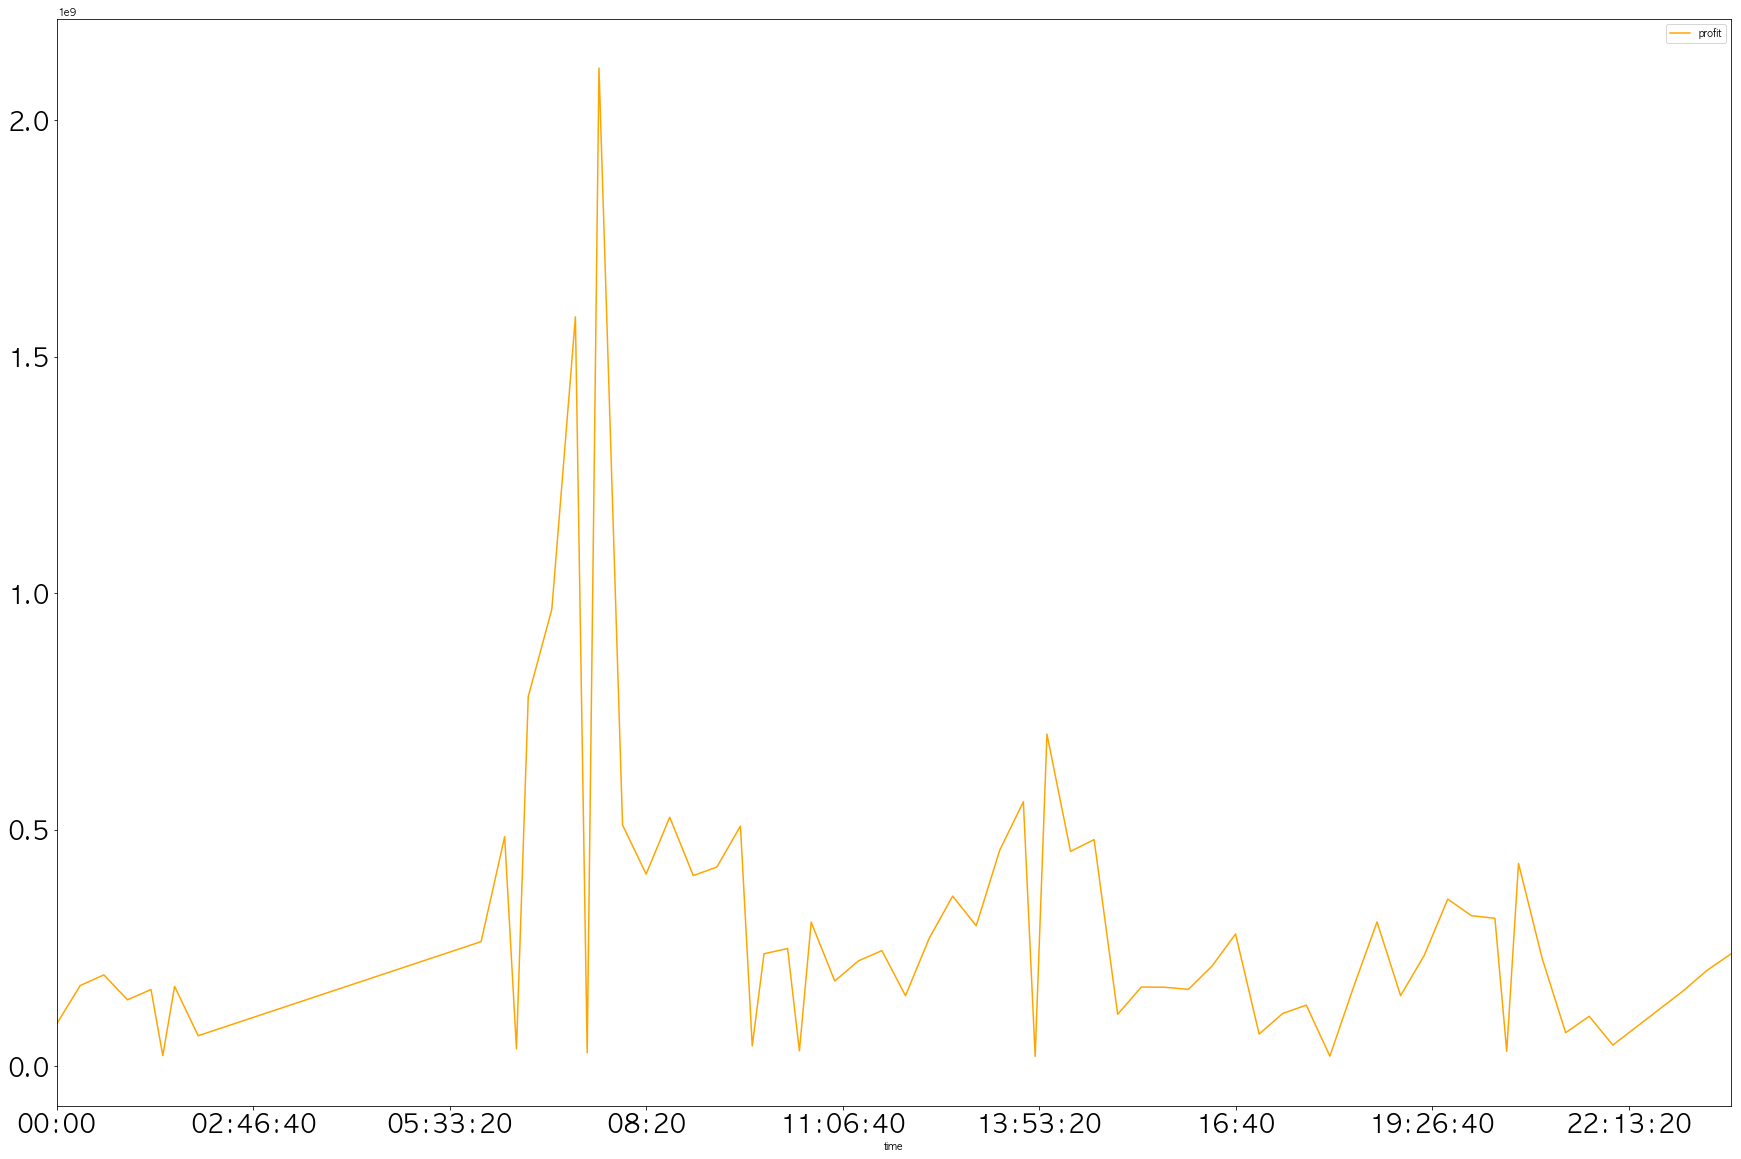

In [20]:
# 건강기능 상품군은 오전 판매가 압도적으로 많음
time_health = retail[retail['상품군']=='건강기능'].groupby('time').sum()['취급액'].to_frame('profit')
time_health.plot(color='orange', figsize=(30, 20), fontsize=25)

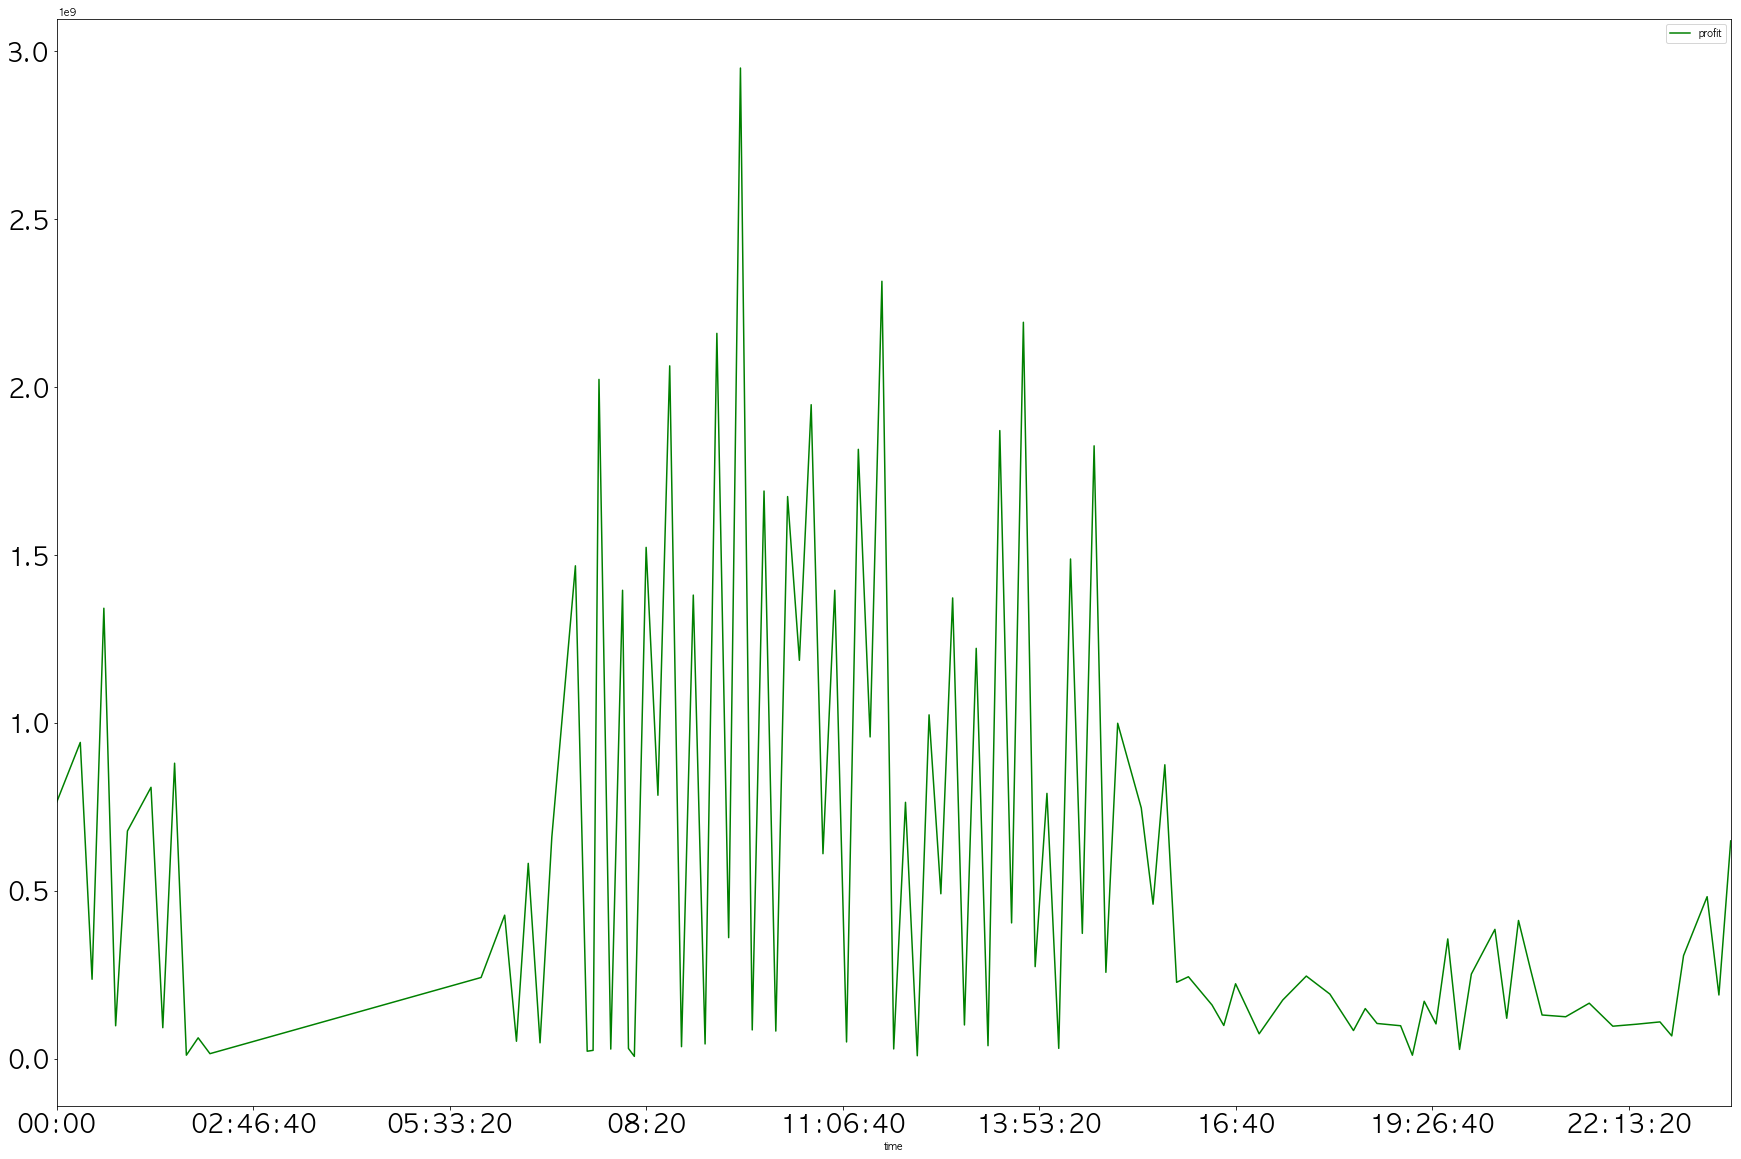

In [21]:
# 잡화는 나머지 두 상품군에 비해 시간대가 고루 분포하는 편이긴 함.
# 의외로 새벽시간 자정-2시도 판매량이 있는 편이고
# 아침 8시 경부터 식품 판매량이 본격적인 4시 전까지 판매되는 편.
time_etc = retail[retail['상품군']=='잡화'].groupby('time').sum()['취급액'].to_frame('profit')
time_etc.plot(color='g', figsize=(30, 20), fontsize=25)

**상품군별로 대충 상품명 쭉 보고 (규칙성을 갖고) 뽑아낼 수 있는 feature 있는지 생각해보기**

In [22]:
# n(마더코드) < n(상품명) < n(상품코드) ;;;;
print("잡화 : ", len(retail[retail['상품군']=='잡화']), "| 상품종류(마더코드) : ", retail[retail['상품군']=='잡화']['마더코드'].nunique(), "| 상품명 : ", retail[retail['상품군']=='잡화']['상품명'].nunique())
print("농수축 : ", len(retail[retail['상품군']=='농수축']), "| 상품종류(마더코드) : ", retail[retail['상품군']=='농수축']['마더코드'].nunique(), "| 상품명 : ", retail[retail['상품군']=='농수축']['상품명'].nunique())
print("건강기능 : ", len(retail[retail['상품군']=='건강기능']), "| 상품종류(마더코드) : ", retail[retail['상품군']=='건강기능']['마더코드'].nunique(), "| 상품명 : ", retail[retail['상품군']=='건강기능']['상품명'].nunique())

잡화 :  3891 | 상품종류(마더코드) :  79 | 상품명 :  262
농수축 :  3884 | 상품종류(마더코드) :  102 | 상품명 :  140
건강기능 :  790 | 상품종류(마더코드) :  36 | 상품명 :  48


In [23]:
# 건강기능류에서는 상품명에서 규칙성/특징 찾기 어려울듯
# 이러면 어케해야하지...? word2vec같은거로 변환해서 nlp 계열로 가야하나? 오바;
pd.DataFrame(retail[retail['상품군']=='건강기능']['상품명'].unique())

,0
0,(직매입) 종근당건강 아이클리어 루테인
1,제주농장 유기 양배추진액 120포
2,종근당건강 전립쎈 프라임
3,베지밀 검은콩 두유 96팩
4,일시불 한삼인순홍삼진7박스 (백A1)
5,무이자 한삼인순홍삼진7박스 (백A1)
6,종근당건강 프로메가 오메가3 파워
7,특집 이롬 황성주1일1생식 스페셜
8,통째로 착즙한 루비 석류즙 84포
9,닥터 슈퍼 루테인


In [24]:
# 수량? 12팩/24팩/10미 등등... 근데 kg단위도 섞여있음
# 농수축도 상품명에서 특징 찾기는 어려울듯
retail[retail['상품군']=='농수축']['상품명'].unique()

array(['뽕셰프 이봉원 특갈비탕 12팩', '국내산 손질갑오징어 8팩', '멋진밥상 흥양농협 햅쌀 20kg',
       '우리바다 손질왕꼬막 24팩', '하늘내린 용대리황태10미', '안동간고등어 20팩',
       'SPC삼립 한입 호빵 13봉(혼합, 팥8+야채5봉)', 'SPC삼립 한입 호빵 13봉(단일, 팥 13봉)',
       '바다먹자 국내산 손질꽃게 7팩', '피시원 국내산 손질 대구 8팩 * 매운탕 양념 8팩',
       '천연담아 명품다시팩 100포', '청정수산 완도활전복 35미', '영산포숙성 홍어8팩+무침3통',
       '소들녘 소 갈비탕', '(a4)팽현숙의 순대 곱창 전골&볶음', '농협안심벌꿀 4병',
       '소들녘 더 맛있는 NEW  돼지왕구이 12팩', '천수봉명인 선재 전통 메주세트', '제주 한라봉2박스+천혜향1박스',
       '궁중 손질새우 200미 + 동태포 200g', '이봉원 정직한 안창살 + 갈비살구이',
       '[농협] 대학 찰 옥수수 10봉(30개)', '전철우 소갈비살구이 10팩',
       '[수협] 자연산 제주 옥돔 + 갈치 세트', 'AAE LA갈비 7팩', '제주바다 7분 손질문어',
       '옛날 그 쥐포 110장 (11팩)', '구워만든 곡물그대로 21, 3종 20봉',
       '구워만든 곡물그대로 21, 오리지널 10봉', '청정수산 완도활전복 中사이즈 26미', '장보고 완도매생이 30개',
       '자연산 손질 통오징어 21미', '천연담아 명품다시팩 120포', '강원도양구 간편시래기 + 시래기 들깨 무침',
       '멋진밥상 흥양농협 쌀 20kg', '캘리포니아 카라카라 오렌지 8kg', '김정문의 섬진강 재첩국 11팩 3.3kg',
       '청정수산 완도활전복 大사이즈 20미', '국내산 손질갑오징어 9팩', '국내산 특大손질갑오징어 6팩',
       '우리바다 손질왕꼬막 20팩', '바다먹자 국내산 손질문어 9팩'

In [25]:
# 여성/남성
# 신발(부츠, 화, 스니커즈, 슈즈, 샌들, 슬립온, )
# 가방(백, 명품-코치/프라다/구찌/버버리) : 잡화에 한해서는 백화점 입점 여부 조사하는게 괜찮을수도?
# 주얼리 및 시계(귀걸이, 목걸이, 팔찌)
retail[retail['상품군']=='잡화']['상품명'].unique()

array(['에펨 여성 미들퍼부츠', '에펨 남성 미들퍼부츠', '로베르타 디 까메리노 노벨라백 2종',
       '일시불[가이거] 제니스시계 주얼리세트', '무이자[가이거] 제니스시계 주얼리세트',
       '일시불[가이거] 콘체르토 다이아몬드 워치(주얼리3종)', '무이자[가이거] 콘체르토 다이아몬드 워치(주얼리3종)',
       '세인트스코트 얼티밋 캐리어 7종 세트(백팩)', '도스문도스 카이만 엠보 소가죽 핸드백 1종',
       '마스케라 밍크니팅모자세트', '마스케라 풀스킨 밍크머플러세트', '엘르 메르시(Merci) 토트백세트',
       '월드컵 남성 워킹화+슬립온', '월드컵 여성 워킹화+슬립온', '칼리베이직 여성백 3종세트',
       '아가타 여성 주얼 슬립온+스트랩슬립온', '로베르타 디 까메리노 아쿠아마레 백팩 4종세트',
       '월드컵 남성다이얼트레킹화세트', '월드컵 여성다이얼트레킹화세트', '에펨 남성 NEW컴포트 캐쥬얼슈즈',
       '에펨 여성 NEW컴포트 캐쥬얼슈즈', '2019 S/S 엘리자베스아덴 선글라스 2종',
       '삭루츠 크로스바디 백(TQ12)', '삭루츠 버켓 백(TQ18)', '삭루츠 투 웨이 백팩(TQ55)',
       '도스문도스 카이만 엠보 소가죽 핸드백 1종(SS)', '스프리스 여성 코트 스니커즈',
       '스프리스 남성 코트 스니커즈', '[플로쥬] 트윙클 아일렛 스니커즈', '월드컵 남성19SS 트레킹화',
       '월드컵 여성19SS트레킹화', '일시불[가이거] 무빙스타 다이아몬드 워치',
       '무이자[가이거] 무빙스타 다이아몬드 워치', '제옥스  남성 가죽 스니커즈', '제옥스  여성 어글리스니커즈',
       '제옥스  남성 가죽 스니커즈(V)', '제옥스  여성 어글리스니커즈(V)', '레코바 남성 다이얼워킹화세트',
       '레코바 여성 다이얼워킹화세트', '트레스패스 여성 다이얼 트레킹화 세트', '트레스패

\- 시간대 나누기  
\- holiday 변수  
\- 요일 변수  
\- 잡화의 경우 추가 feature 생성 가능 (regular expression)  
\- 변수명 및 dataset 이름 팀원끼리 통일하고 영문으로 바꾸기  

In [26]:
etc = retail.groupby('상품군').get_group('잡화')
print(type(etc))
etc

<class 'pandas.core.frame.DataFrame'>


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,month,day,time,hour,minute,판매수량
171,2019-01-03 06:00:00,20.0,100781,202292,에펨 여성 미들퍼부츠,잡화,39800,2450000.0,2019-01-03,1,3,06:00:00,6,0,61.557789
172,2019-01-03 06:00:00,20.0,100781,202285,에펨 남성 미들퍼부츠,잡화,49800,2645000.0,2019-01-03,1,3,06:00:00,6,0,53.112450
173,2019-01-03 06:20:00,20.0,100781,202292,에펨 여성 미들퍼부츠,잡화,39800,5609000.0,2019-01-03,1,3,06:20:00,6,20,140.929648
174,2019-01-03 06:20:00,20.0,100781,202285,에펨 남성 미들퍼부츠,잡화,49800,3874000.0,2019-01-03,1,3,06:20:00,6,20,77.791165
175,2019-01-03 06:40:00,20.0,100781,202292,에펨 여성 미들퍼부츠,잡화,39800,9045000.0,2019-01-03,1,3,06:40:00,6,40,227.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38217,2019-12-31 08:20:00,20.0,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000,6997000.0,2019-12-31,12,31,08:20:00,8,20,142.795918
38218,2019-12-31 08:40:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000,12394000.0,2019-12-31,12,31,08:40:00,8,40,252.938776
38219,2019-12-31 08:40:00,20.0,100390,201264,[RYN] 린 여성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000,13563000.0,2019-12-31,12,31,08:40:00,8,40,276.795918
38220,2019-12-31 09:00:00,20.0,100390,201261,[RYN] 린 남성 다이얼락 히트 웜 퍼 방한화 2종,잡화,49000,21728000.0,2019-12-31,12,31,09:00:00,9,0,443.428571


In [27]:
import re

def gender(name):
    '''
    return 'f': female / 'm': male / 'n': neutral
    '''
    if re.search('여성', name):
        return 'f'
    elif re.search('남성', name):
        return 'm'
    else:
        return 'n'
    
def shoes(name):
    '''
    return True / False
    '''
    catalog = ['부츠', '화', '스니커즈', '슈즈', '샌들', '슬립온', '슬리퍼']
    isShoe = False
    for shoe in catalog:
        if re.search(shoe, name):
            isShoe=True
    return isShoe

def bag(name):
    '''
    return True / False
    '''
    catalog = ['백', '가방', '사첼']
    isBag = False
    for b in catalog:
        if re.search(b, name):
            isBag=True
    return isBag

In [28]:
print(shoes(etc['상품명'].iloc[1]))
print(gender(etc['상품명'].iloc[1]))
print(bag(etc['상품명'].iloc[1]))
etc['상품명'].iloc[1]

True
m
False


'에펨 남성 미들퍼부츠'

\- 변수화할지 의논 후 dataframe에 적용하기!

In [34]:
rating

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [48]:
# 시간대별 연간 일평균 시청률
day_avg = pd.concat([rating['시간대'], rating['2019-01-01 to 2019-12-31']], axis=1)
day_avg = day_avg.rename(columns={'시간대' : 'timestamp', '2019-01-01 to 2019-12-31' : 'rating'})
day_avg.head()

,timestamp,rating
0,02:00,0.003
1,02:01,0.003
2,02:02,0.004
3,02:03,0.004
4,02:04,0.004


In [69]:
# rating = rating.iloc[:1440]
# rating = rating.iloc[:,:-1]
# rating = rating.iloc[:,1:]
rating.set_index(rating['시간대'], inplace=True)
rating = rating.iloc[:,1:-1]

In [72]:
rating.index

Index(['02:00', '02:01', '02:02', '02:03', '02:04', '02:05', '02:06', '02:07',
       '02:08', '02:09',
       ...
       '01:51', '01:52', '01:53', '01:54', '01:55', '01:56', '01:57', '01:58',
       '01:59', '월화수목금토일02:00-01:59'],
      dtype='object', name='시간대', length=1441)

In [74]:
timestamp = []
rate = []
for date in rating.columns:
    for time in rating.index:
        timestamp.append('{} {}'.format(date, time))
        rate.append(rating.loc[time,date])
        
df_rating = pd.DataFrame({'timestamp':timestamp,'rating':rate})
df_rating

,timestamp,rating
0,2019-01-01 02:00,0.000
1,2019-01-01 02:01,0.000
2,2019-01-01 02:02,0.000
3,2019-01-01 02:03,0.000
4,2019-01-01 02:04,0.000
...,...,...
525960,2019-12-31 01:56,0.000
525961,2019-12-31 01:57,0.000
525962,2019-12-31 01:58,0.000
525963,2019-12-31 01:59,0.000


In [75]:
# 시청률 0이면 드랍
df_rating = df_rating[df_rating.rating != 0]
df_rating

,timestamp,rating
9,2019-01-01 02:09,0.014
100,2019-01-01 03:40,0.014
101,2019-01-01 03:41,0.011
102,2019-01-01 03:42,0.011
103,2019-01-01 03:43,0.011
...,...,...
525862,2019-12-31 00:18,0.050
525863,2019-12-31 00:19,0.050
525864,2019-12-31 00:20,0.024
525865,2019-12-31 00:21,0.024
